In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torchvision
import torchvision.transforms as transforms

Files already downloaded and verified


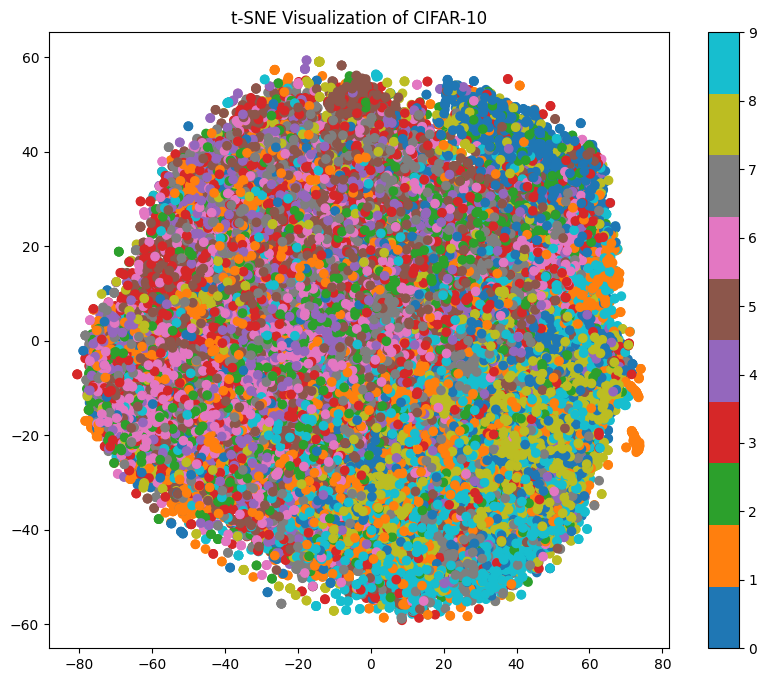

In [3]:
# Load CIFAR-10 dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='/store/datasets/CIFAR10', train=True, download=True, transform=transform)
X, y = trainset.data, np.array(trainset.targets)

# Preprocess the data
X = X / 255.0  # Normalize pixel values
X = X.reshape(X.shape[0], -1)  # Flatten the images

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.colorbar()
plt.title('t-SNE Visualization of CIFAR-10')
plt.show()

### I recognized that we need to extract final features for a trained CIFAR10 model to visualize it in tSNE

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
y_test = np.load("tsneF_train_y.npy")
X_tsne = np.load("tsneF_train.npy")

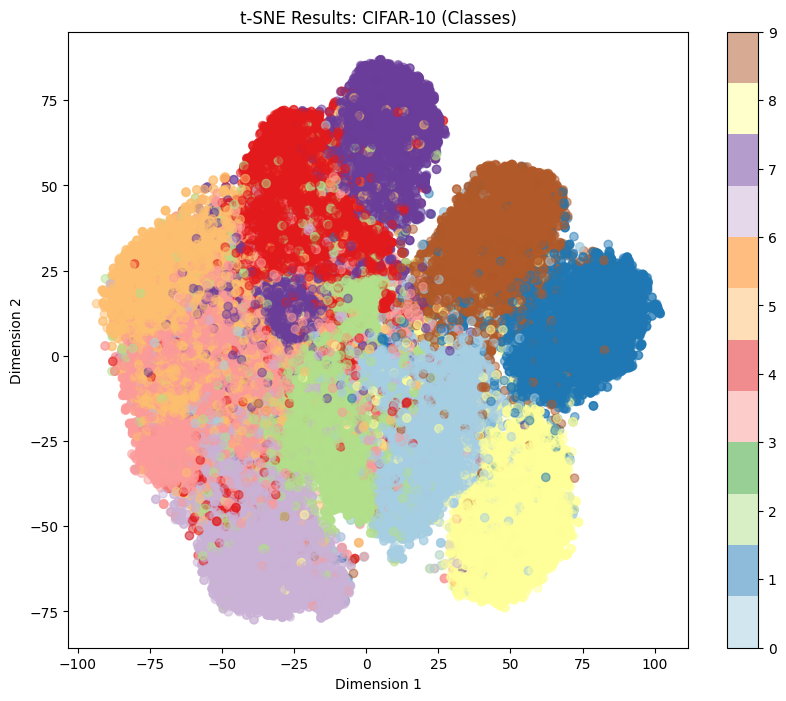

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='Paired',alpha=0.5)
plt.colorbar()
plt.title('t-SNE Results: CIFAR-10 (Classes)')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
#plt.savefig("trained_tsne_train.png")
#np.save("tsneF_train.npy", X_tsne)
#np.save("tsneF_train_y.npy", y_test)


In [46]:
y_test = np.load("tsne_y_distorted.npy")
X_tsne = np.load("tsneF_train.npy")

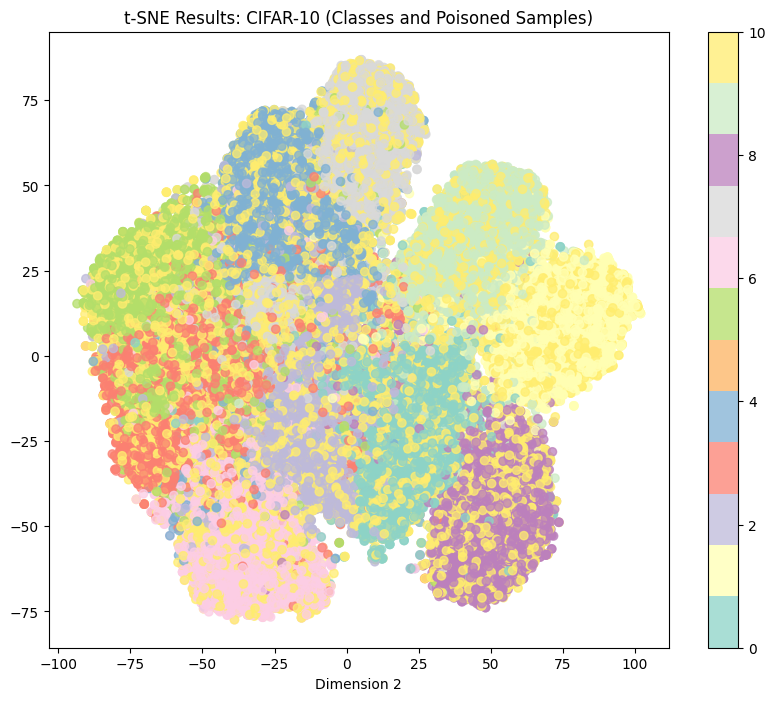

In [77]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='Set3',alpha=0.75)
plt.colorbar()
plt.title('t-SNE Results: CIFAR-10 (Classes and Poisoned Samples)')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
#plt.savefig("trained_tsne_train.png")
#np.save("tsneF_train.npy", X_tsne)
#np.save("tsneF_train_y.npy", y_test)


# ARFED find indices to be plotted

In [18]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [19]:
# poisonous data samples
poisonous_samples = ['y_train25', 'y_train85', 'y_train96', 'y_train89', 'y_train65', 'y_train94', 'y_train5', 'y_train35', 'y_train36', 'y_train92', 'y_train71', 'y_train52', 'y_train24', 'y_train16', 'y_train60', 'y_train87', 'y_train53', 'y_train98', 'y_train47', 'y_train49', 'y_train15', 'y_train41', 'y_train93', 'y_train61', 'y_train81', 'y_train8', 'y_train95', 'y_train21', 'y_train86', 'y_train17']
poisonous_samples_ids = [ int(poisonous_samples[i][7:]) for i in range(len(poisonous_samples))]
poisonous_samples_ids.sort()
# ARFED's detections
all_clients= np.arange(0,100,1)
ARFED_accepts = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
ARFED_rejects = np.setxor1d(all_clients,ARFED_accepts)
ARFED_rejects = np.array(ARFED_rejects)

In [20]:
file = open('../histories/CIFAR10/hist_mining_FLCIFAR10_uniform_organized_numclients_100_ratio_0.3.txt')
trustshield = json.load(file)
file.close()
trustshield_rejects = trustshield['blacklisted_edges'][-1]
trustshield_rejects_ids = np.array([ int(trustshield_rejects[i][5:]) for i in range(len(trustshield_rejects))])
trustshield_rejects_ids.sort()
trustshield_rejects_ids

array([ 5,  8, 15, 16, 17, 21, 24, 25, 35, 36, 41, 47, 49, 52, 53, 60, 61,
       65, 71, 81, 85, 86, 87, 89, 92, 93, 94, 95, 96, 98])

In [21]:
poisonous_samples_ids = np.array(poisonous_samples_ids)

In [5]:
trustshield_rejects_ids == poisonous_samples_ids

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [6]:
ARFED_rejects

array([47])

In [10]:
import os
os.getcwd()

'/home/ob3942/fl_blockchain/fl_utils'

In [22]:
# get the indices for the feature embeddings
X_ind = np.load("tsne_X_ind.npy")
# initialize the colormap with 0s
original_labels = np.load("tsneF_train_y.npy")
tsnefig2 = np.zeros(np.shape(original_labels))
# find the samples where only TrustShield works to detect poisoning
for i in range(len(trustshield_rejects_ids)):
    sample = trustshield_rejects_ids[i]
    node_inds = np.load("../node_inds/x_train"+str(sample)+"_xind.npy", allow_pickle=True)
    for ind in node_inds:
        foundin = np.where(ind==X_ind)
        if np.shape(foundin)[1]:
            tsnefig2[foundin[0][0]]=2
# find the samples where both scheme works to detect poisoning
for i in range(len(ARFED_rejects)):
    sample = ARFED_rejects[i]
    node_inds = np.load("../node_inds/x_train"+str(sample)+"_xind.npy", allow_pickle=True)
    for ind in node_inds:
        foundin = np.where(ind==X_ind)
        if np.shape(foundin)[1]:
            tsnefig2[foundin[0][0]]=1


In [40]:
np.sum(tsnefig2==1)

500

In [41]:
np.sum(tsnefig2==2)

14495

In [42]:
np.sum(tsnefig2==0)

34995

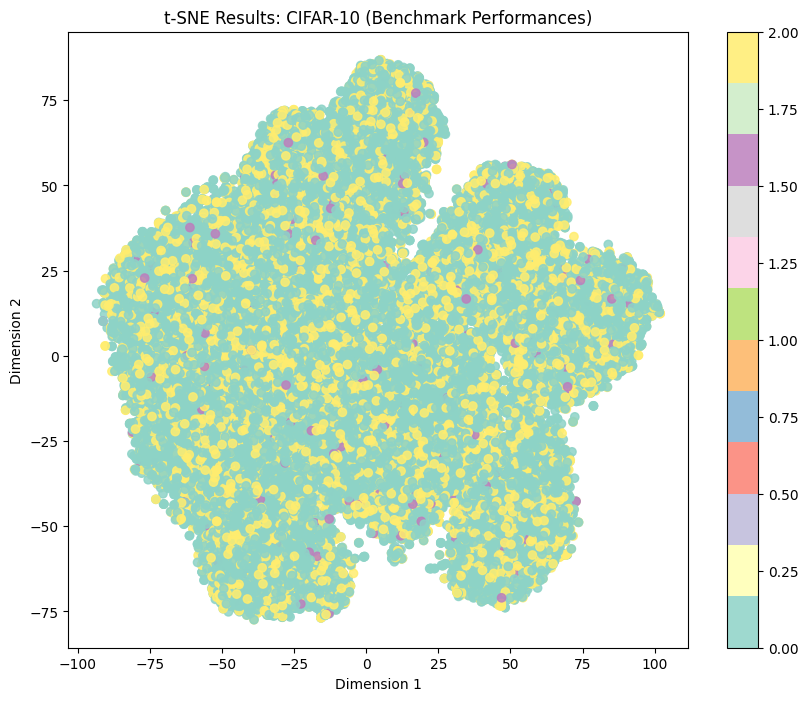

In [23]:
tsnefig3 = tsnefig2.copy()
tsnefig3[tsnefig3==1]=1.6
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsnefig3, cmap='Set3',alpha=0.85)
plt.colorbar()
plt.title('t-SNE Results: CIFAR-10 (Benchmark Performances)')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
#plt.legend(['1','2','3'])
plt.show()